## Online Payments Fraud Detection

# Dataset Details

# Import libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Exploratory Data Analysis

In [2]:
data = pd.read_csv("fraud_detection_dataset.csv")

In [3]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
data.sample(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2549710,206,CASH_OUT,139599.79,C2133575820,50087.00,0.00,C1294721144,0.00,139599.79,0,0
2322876,188,TRANSFER,1066223.91,C491615141,0.00,0.00,C858188884,6695995.04,7762218.95,0,0
4363589,310,PAYMENT,16343.26,C1041461093,79574.00,63230.74,M1399499093,0.00,0.00,0,0
863835,42,CASH_IN,107742.70,C621848428,28539356.25,28647098.95,C1717139449,167313.82,59571.12,0,0
4876149,348,CASH_OUT,124644.93,C1444857292,10707.00,0.00,C946186798,4041707.98,4166352.92,0,0


In [5]:
data.shape

(6362620, 11)

Check the descriptive statistics and Data types 

In [6]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [7]:
data.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [8]:
# check the null values
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

There is no null values in our dataset

In [9]:
data["step"].value_counts()

19     51352
18     49579
187    49083
235    47491
307    46968
       ...  
432        4
706        4
693        4
112        2
662        2
Name: step, Length: 743, dtype: int64

Text(0.5, 1.0, 'Distribution of Transection Step ')

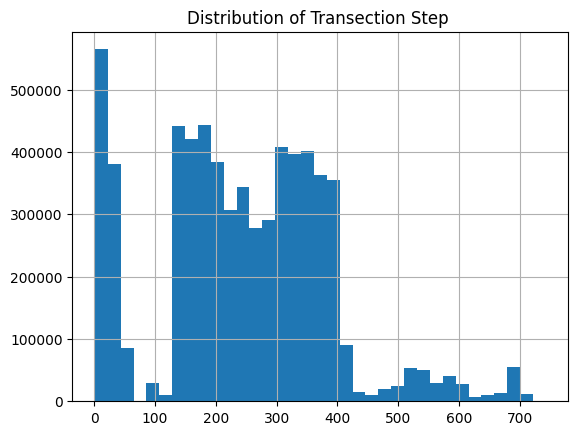

In [10]:
data["step"].hist(bins = 35)
plt.title("Distribution of Transection Step ")

We can see from above visualization it is an imbalanced dataset 

In [11]:
data["type"].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

Text(0.5, 1.0, 'Distribution of Transaction Type')

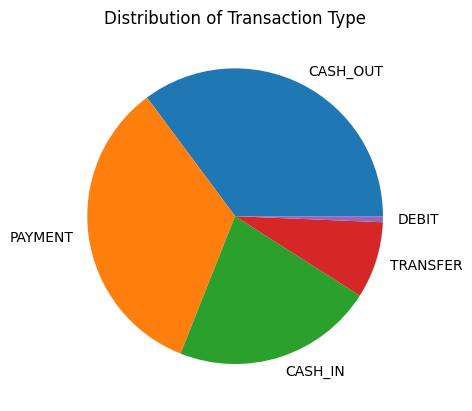

In [12]:
types = data["type"].value_counts()
plt.pie(types.values , 
        labels = types.index)
plt.title("Distribution of Transaction Type")

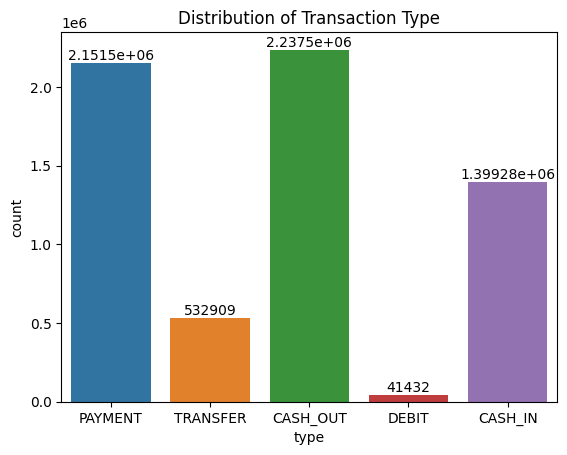

In [13]:
ax = sns.countplot(x = "type" , data = data)
plt.title("Distribution of Transaction Type")
for bars in ax.containers:
     ax.bar_label(bars)

The most transaction type is CASH_OUT with slight difference than PAYMENT

Text(0.5, 1.0, 'Distribution_of_Transaction_Amount')

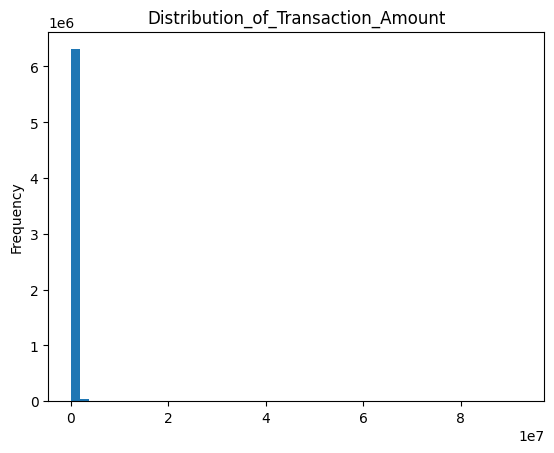

In [14]:
#Distribution of transaction amount
data['amount'].plot.hist(bins=50)
plt.title('Distribution_of_Transaction_Amount')

The distribution of amount is left skewed

In [15]:
data["nameOrig"].value_counts()

C1902386530    3
C363736674     3
C545315117     3
C724452879     3
C1784010646    3
              ..
C98968405      1
C720209255     1
C1567523029    1
C644777639     1
C1280323807    1
Name: nameOrig, Length: 6353307, dtype: int64

There are more than 6.3 million customers starting the transaction so we should drop this column.

In [16]:
data['nameDest'].value_counts()

C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
              ... 
M1470027725      1
M1330329251      1
M1784358659      1
M2081431099      1
C2080388513      1
Name: nameDest, Length: 2722362, dtype: int64

There are more than 2.7 million recipients. Some recipients appear more than once and some recipients appear only once. 


Text(0.5, 1.0, 'Distribution_of_Transaction_oldbalanceOrg')

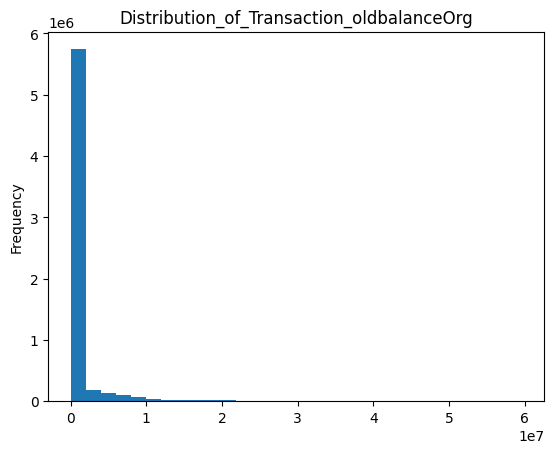

In [17]:
data['oldbalanceOrg'].plot.hist(bins=30)
plt.title('Distribution_of_Transaction_oldbalanceOrg')

The distribution of oldbalanceOrg left skewed

Text(0.5, 1.0, 'Distribution_of_Transaction_newbalanceOrig')

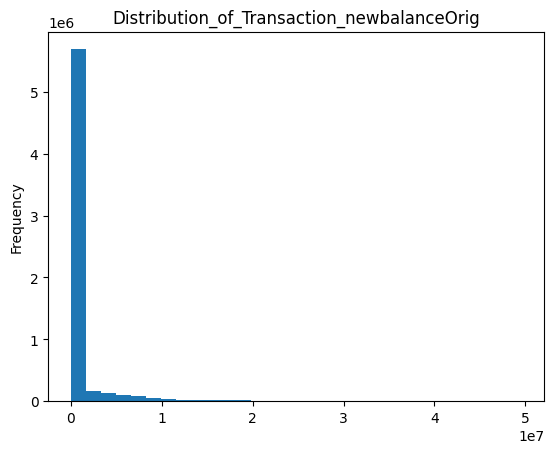

In [18]:
data['newbalanceOrig'].plot.hist(bins=30)
plt.title('Distribution_of_Transaction_newbalanceOrig')

The distribution of newbalanceOrig is left skewed

Text(0.5, 1.0, 'Distribution_of_Transaction_oldbalanceDest')

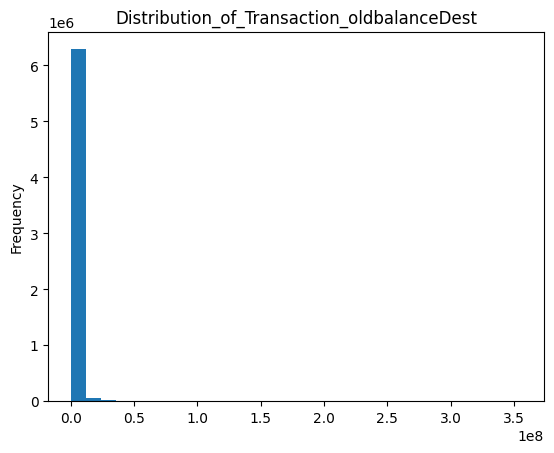

In [19]:
data['oldbalanceDest'].plot.hist(bins=30)
plt.title('Distribution_of_Transaction_oldbalanceDest')

The distribution of oldbalanceDest is left skewed

Text(0.5, 1.0, 'Distribution_of_Transaction_newbalanceDest')

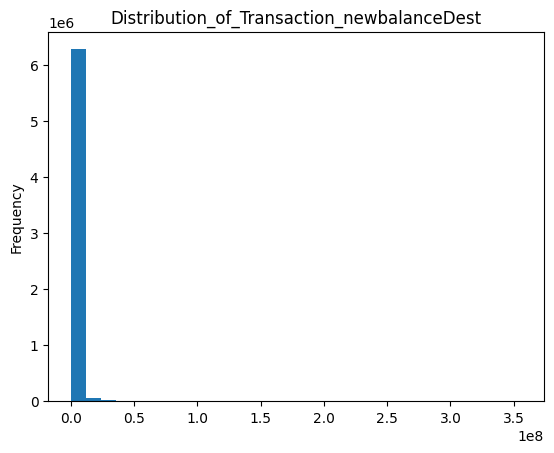

In [20]:
data['newbalanceDest'].plot.hist(bins=30)
plt.title('Distribution_of_Transaction_newbalanceDest')

The distribution of newbalanceDest is left skewed

In [21]:
data['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

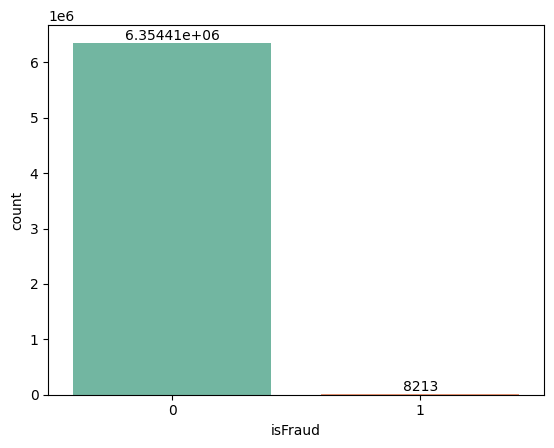

In [22]:
ax = sns.countplot(x='isFraud',data=data ,palette = 'Set2')
 
for bars in ax.containers:
    ax.bar_label(bars)

In [23]:
# creating a custom function for checking outliers
def get_box(column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    median  = data[column].median()
    iqr = q3 - q1
    upper_limit = q3 + 1.5*iqr
    lower_limit = q1 - 1.5*iqr
    outlier_high = len(data[column][data[column]>upper_limit])
    outlier_low = len(data[column][data[column]<lower_limit])
    
    sns.boxplot(data[column], color= "green" )
    plt.title(f"IQR = {iqr} ; Median = {median} \n Q1,Q3 = {q1,q3} \n Outlier(Low,High) = {outlier_low,outlier_high}")
    
        

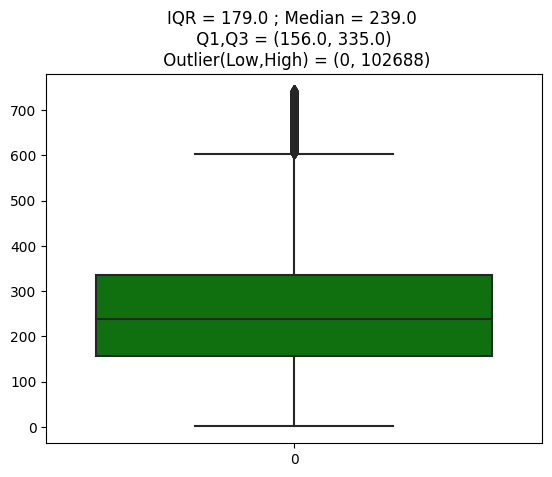

In [24]:
get_box("step")

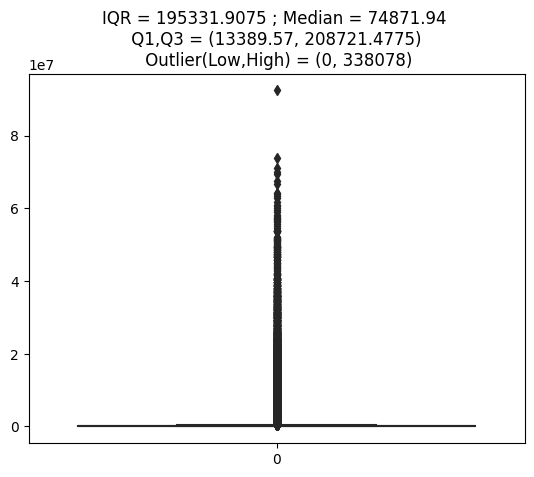

In [25]:
get_box("amount")

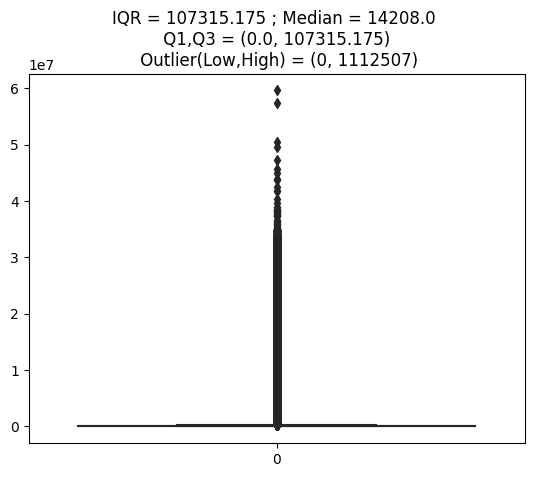

In [26]:
get_box("oldbalanceOrg")

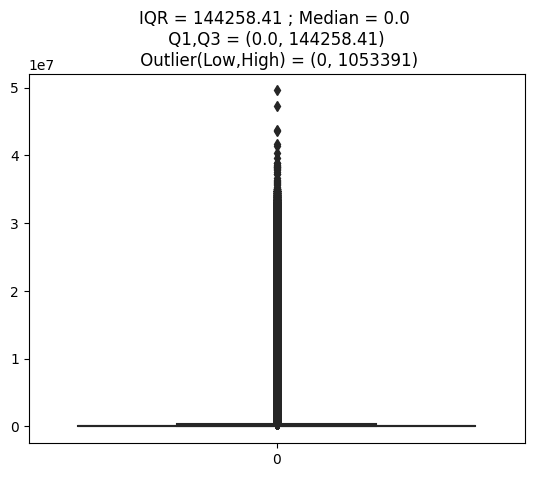

In [27]:
get_box("newbalanceOrig")

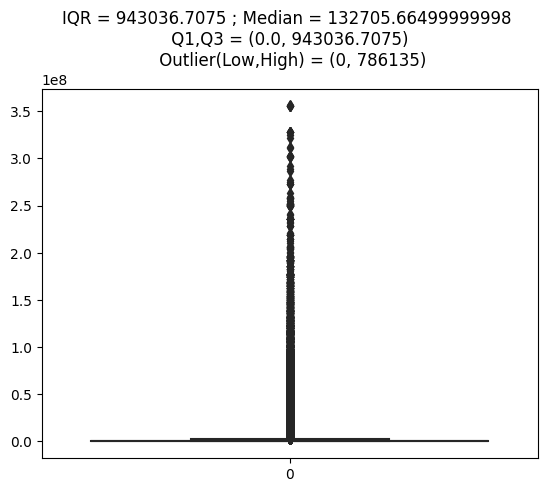

In [28]:
get_box("oldbalanceDest")

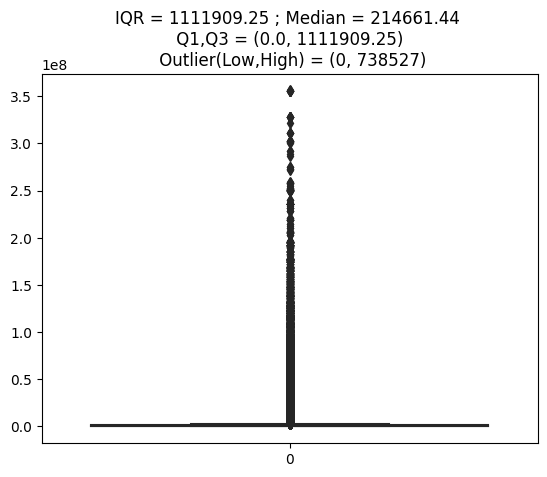

In [29]:
get_box("newbalanceDest")

From above boxplots we can find that there are lots of outliers present in each features.So after dropping the outliers using IQR(Interquartile range) method,We deleted almost all fraud transactions from the dataframe.So removing Outliers in this case is not good option.

In [30]:
# creating dummy variable for Type column 
dummy = pd.get_dummies(data['type'], drop_first= True)
data = pd.concat([data,dummy] ,axis = 1)

In [31]:
data.sample(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER
100142,10,CASH_IN,80754.00,C2039642545,8080752.64,8161506.64,C1648692463,292686.14,61974.69,0,0,0,0,0,0
2400335,202,CASH_OUT,25913.27,C826695457,0.00,0.00,C1400270309,1152611.68,1178524.94,0,0,1,0,0,0
6200407,576,CASH_IN,88948.05,C438641522,2159918.13,2248866.18,C280545626,145790.97,56842.92,0,0,0,0,0,0
2213824,186,PAYMENT,3885.19,C701581877,61999.04,58113.85,M360728852,0.00,0.00,0,0,0,0,1,0
5560062,384,PAYMENT,486.57,C898334814,331651.00,331164.43,M464561007,0.00,0.00,0,0,0,0,1,0


In [32]:
# Droping columns which are not needed
data.drop(columns = ["type","nameOrig","nameDest","isFlaggedFraud"] , inplace = True)

In [33]:
data.sample(3)

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER
5242969,371,235295.58,0.0,0.00,595177.78,830473.37,0,1,0,0,0
5502674,380,17425.25,35940.3,18515.05,0.00,0.00,0,0,0,1,0
2469642,204,197819.00,0.0,0.00,3231390.94,3429209.94,0,1,0,0,0


# Train Test Split

In [34]:
x = data.drop(columns = ["isFraud"])
y = data["isFraud"]

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
y.value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [37]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size= 0.2 , random_state= 12 , stratify= y)

In [38]:
y_train.value_counts()

0    5083526
1       6570
Name: isFraud, dtype: int64

In [39]:
y_test.value_counts()

0    1270881
1       1643
Name: isFraud, dtype: int64

In [40]:
x_train.shape

(5090096, 10)

In [41]:
x_test.shape

(1272524, 10)

# Training and Predicting

In [42]:
from sklearn.tree import DecisionTreeClassifier

In [43]:
model = DecisionTreeClassifier()

In [44]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [45]:
y_pred = model.predict(x_test)

# Check The Accuracy

In [46]:
from sklearn.metrics import classification_report

In [47]:
report  = classification_report(y_test,y_pred)

In [48]:
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.88      0.87      0.87      1643

    accuracy                           1.00   1272524
   macro avg       0.94      0.93      0.94   1272524
weighted avg       1.00      1.00      1.00   1272524



We got 100% accuracy but the F1 score for class 1 is just 87%. It is because of Imbalanced data so we have to balance this data. For this purpose we will use SMOTE to balance the data.

 # Using SMOTE to balance the data

In [49]:
from imblearn.over_sampling import SMOTE

In [53]:
smote = SMOTE(sampling_strategy='auto', random_state=42)
x_resampled, y_resampled = smote.fit_resample(x, y)

In [55]:
x_train,x_test,y_train,y_test = train_test_split(x_resampled,y_resampled, test_size= 0.2 , random_state= 12 )

In [60]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [61]:
y_pred = model.predict(x_test)

In [62]:
report  = classification_report(y_test,y_pred)

In [63]:
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1269969
           1       1.00      1.00      1.00   1271794

    accuracy                           1.00   2541763
   macro avg       1.00      1.00      1.00   2541763
weighted avg       1.00      1.00      1.00   2541763



After using SMOTE we got 100% F1 score for both classes on test dataset. Hence our model is working great.